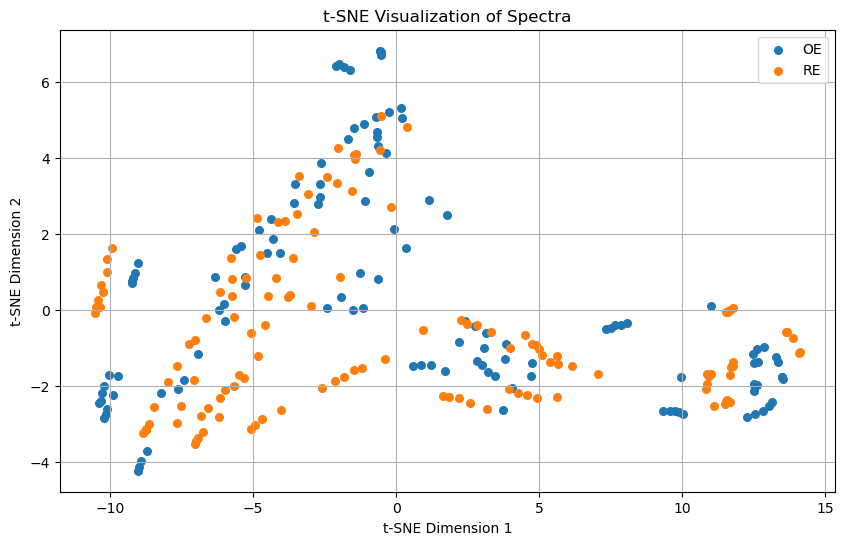

In [15]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Beispiel: Pfad zum Ordner mit den normalisierten Spektren
folder_path = "/Users/leokavallaris/FTIR ATR/Spectra OE RE/122"

# Ziel-Länge der Spektren
target_length = 2523

spectra = []
labels = []  # RE oder OE
for file_name in os.listdir(folder_path):
    if file_name.endswith("_cut.csv"):
        # Lese die normalisierten Spektraldaten ein
        file_path = os.path.join(folder_path, file_name)
        normalized_absorbance = np.loadtxt(file_path, delimiter=',')
        # Zuschnitt oder Padding auf die Ziel-Länge
        if len(normalized_absorbance) > target_length:
            normalized_absorbance = normalized_absorbance[:target_length]
        elif len(normalized_absorbance) < target_length:
            # Padding mit Nullen, falls erforderlich
            normalized_absorbance = np.pad(normalized_absorbance, (0, target_length - len(normalized_absorbance)), mode='constant')
        spectra.append(normalized_absorbance)
        # Bestimme die Klasse (RE oder OE) anhand des Dateinamens
        if "RE" in file_name:
            labels.append("RE")
        elif "OE" in file_name:
            labels.append("OE")

# Konvertiere die Listen von Spektren und Labels in numpy-Arrays
spectra = np.array(spectra)
labels = np.array(labels)

# Skalieren der Daten
scaler = StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)

# Anwenden von t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=1)
tsne_embeddings = tsne.fit_transform(scaled_spectra)

# Plot der t-SNE-Einbettung
plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    indices = np.where(labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label, s=30)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Spectra')
plt.grid(True)
plt.legend()
plt.show()
